Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 90us/step - loss: 0.5233 - acc: 0.7825 - val_loss: 0.4066 - val_acc: 0.8468
Epoch 2/4
15000/15000 [==============================] - 1s 81us/step - loss: 0.3115 - acc: 0.9039 - val_loss: 0.3142 - val_acc: 0.8827
Epoch 3/4
15000/15000 [==============================] - 1s 81us/step - loss: 0.2304 - acc: 0.9258 - val_loss: 0.2816 - val_acc: 0.8920
Epoch 4/4
15000/15000 [==============================] - 1s 80us/step - loss: 0.1823 - acc: 0.9424 - val_loss: 0.2993 - val_acc: 0.8778


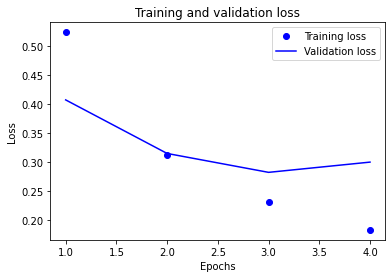

25000/25000 [==============================] - 2s 76us/step
[0.3245796118211746, 0.8668000102043152]


In [6]:
# This code trains an AI to classify movie reviews as positive or negative. 
# The IMDB dataset consists of 50000 reviews with 25000 for training and
# 25000 for testing. Each review has been turned into a sequence of integers 
# where each integer stands for a word in the dictonary.

from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension=10000):

    # Make 10000 dimension vector filled with 0.
    # Make it have two rows since a word may appear multiple times.
    results = np.zeros((len(sequences), dimension))

    # Enumerate has a counter as well as going through the sequences.
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
      
    return results


# num_worsd=10000 means only keep top 10000 most frequently seen words.
# train/test_labels are 1 for positive and 0 for negative.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Before we can train our AI we need to turn the sequences into tensors that
# the AI can understand. We turn the sequences into 10000 dimension vectors 
# where the index of the integer is a 1. E.g. [5] would be a vector with 99999 
# zeros and 1 1 at vector[4].
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# The architecture we are using are 2 intermediate dense layers with 16 hidden
# units. A third layer that outputs a scalar prediction between 0 and 1 indicating
# how likely the sample has the target 1. Having more hidden units allows AI to
# to learn more complex representations but it can lead to unwanted patterns 
# and increases computation complexity. A relu (rectified linear unit) zeros out
# any negative values. A sigmoid activation squashes values to between 0 and 1
# so that it can be output as a probability.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# The reason to use an activation function is that without it each layer would
# apply dot(Weight_matrix, input_matrix) + b. This is a linear transformation
# so the hypothesis space for the layer would just be all possible linear transformations.
# This would be too restricted so an activation function is needed. You can use relu
# prelu elu etc.

# To monitor the training accuracy you make a validation set by setting apart
# 10000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Our loss function is binary_crossentroy. You can use other ones like mean_squared_error
# but binary_crossentropy is good for models that output probabilities.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Returns a History object which has member history which is a dictonary containing
# everything that happened during training.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# We can plot the training and validation data.
history_dict = history.history
acc = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting epochs against loss. bo is blue dot. b is blue line
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

print(model.evaluate(x_test, y_test))

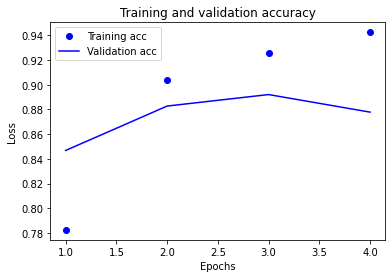

In [7]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()